In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
params = {"ytick.color" : "g",
          "xtick.color" : "g",
          "text.color" : "g",
          "axes.labelcolor" : "g",
          "axes.edgecolor" : "g"}
plt.rcParams.update(params)

In [4]:

delta = .0001
## Set x and y range
lenX = .120 # range we are looking at (120 mm)
R = .048 ## mm (2/3 the size of the range you are looking at)
range_x = np.arange(0, lenX, delta)
lenZ = R/4.0 ## the distance between your plates
range_z = np.arange(-lenZ/2, lenZ/2, delta)

#Set meshgrid
X, Z = np.meshgrid(range_x, range_z)


V_o = 25.0 ## Voltage applied to plates

def griff_anal(X,Y,V_o, diam,d,n):
    term_1 = (4.0*V_o)/np.pi
    term_2 = 0
    for i in range(1,n*2,2): 
        term_2 += (np.cosh((float(i)*np.pi*Y)/float(diam))*np.sin((float(i)*np.pi*X)/float(diam)))/(float(i)*np.cosh((float(i)*np.pi*float(d))/(2.0*float(diam))))
    
    return term_1*term_2

In [11]:
U_anal = griff_anal(X,Z,V_o,lenX, lenZ,1100)

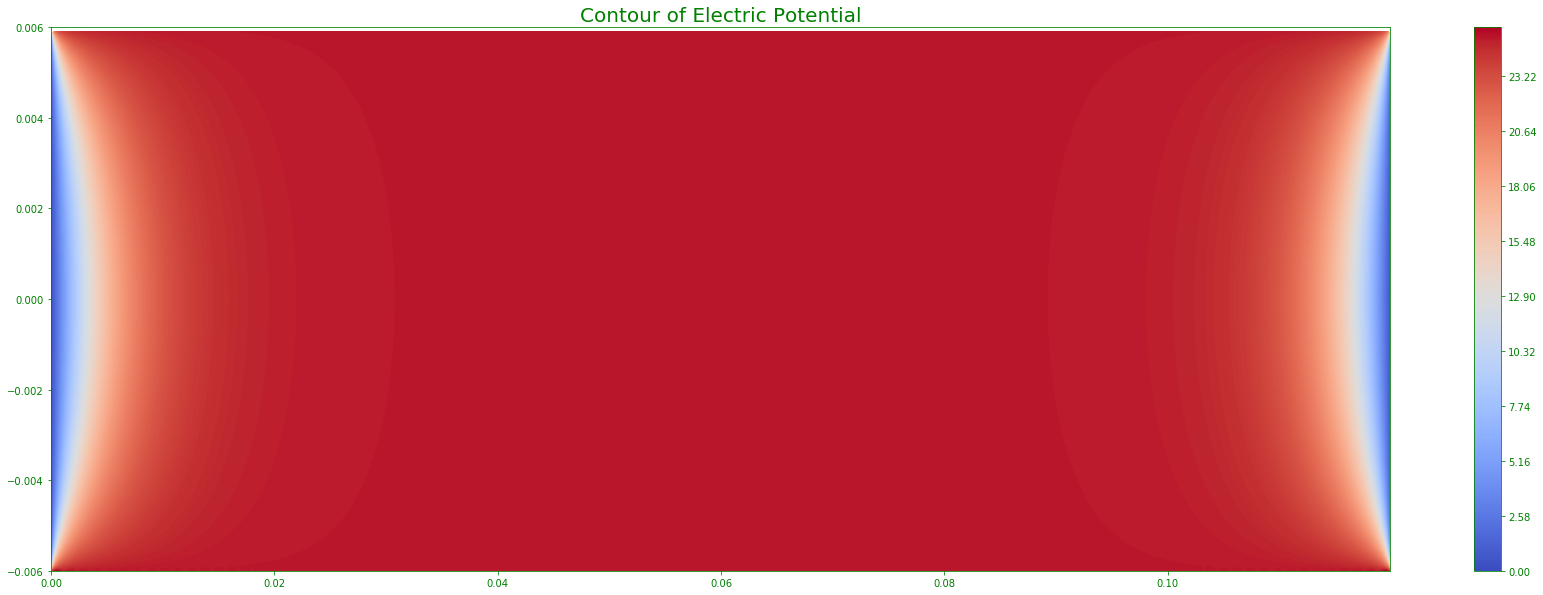

In [12]:
colorinterp = 1000
colormap = plt.cm.coolwarm
figure = plt.figure(figsize=(30,10))
plt.contourf(X,Y, U_anal, colorinterp, cmap=colormap)
plt.ylim((-lenY/2,lenY/2))
plt.title("Contour of Electric Potential", fontsize=20)
#Set Colorbar
plt.colorbar()

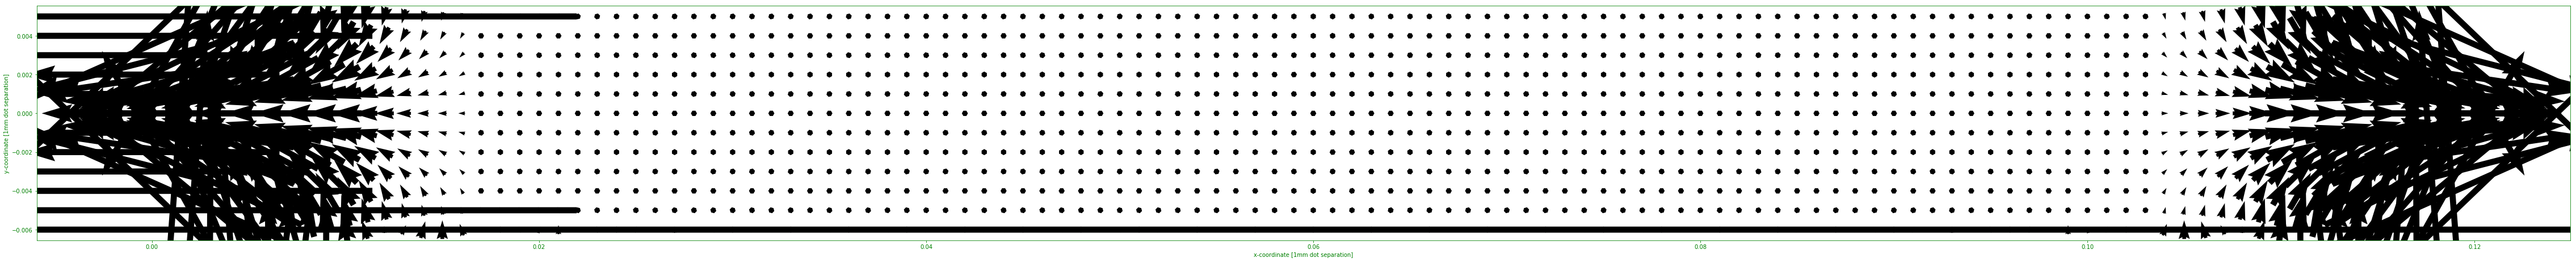

In [13]:
E_U = np.empty((len(range_y),len(range_x)))
E_V = np.empty((len(range_y),len(range_x)))

#grad_span = 1
skip = 10
E_U, E_V = np.gradient(U_anal, delta)
E_U = -1.0*E_U
E_V = -1.0*E_V

X_new = X
#Y_new = Y[grad_span:-grad_span,grad_span:-grad_span]
Y_new = Y
fig, ax = plt.subplots(figsize=(80, 40))
q = ax.quiver(X[::skip,::skip], Y[::skip,::skip], E_V[::skip,::skip], E_U[::skip,::skip], units='xy', pivot='mid', cmap='magma')
ax.set_aspect('equal')
plt.xlabel('x-coordinate [1mm dot separation]')
plt.ylabel('y-coordinate [1mm dot separation]')
plt.show()